# Babysitting the Learning Process with TensorBoard

Even with TensorFlow's built in Estimators, there are a huge number of hyperparameters to tune and tweak. This is the black magic part of neural networks. Sometimes things just work, and there's no great analytical reason why. This makes it really key for us to be able to sit on top on the model as it learns.

TensorFlow provides [TensorBoard](https://www.tensorflow.org/get_started/summaries_and_tensorboard), a visualization layer on top of the training process. 

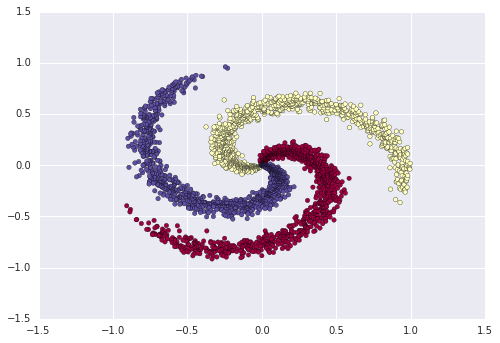

In [1]:
# We really like this spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 1000 # points per class
D = 2 # dimensionality at 2 so we can eyeball it
K = 3 # number of classes

X = np.zeros((N*K, D)) # generate an empty matrix to hold X features
y = np.zeros(N*K, dtype='int32') # switching this to int32 

# for 3 classes, evenly generates spiral arms
for j in xrange(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.cm.Spectral)
plt.show()

## A much more highly optimized DNNClassifier

We should be getting 0.95 accuracy

In [4]:
import tensorflow as tf

# what should the classifier expect in terms of features
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=D)]

# defining the actual classifier 
dnn_spiral_classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            activation_fn = tf.nn.relu, 
                                            hidden_units = [20,10],  # one hidden layer, containing 10 neurons
                                            n_classes = K, # K target classes 
                                            model_dir="/tmp/spiral_model_learning") # directory for saving model checkpoints

# turn data into tensors to feed into the computational graph
# honestly input_fn could also handle these as np.arrays but this is here to show you that the tf.constant operation can run on np.array input
def get_inputs(): 
  X_tensor = tf.constant(X)
  y_tensor = tf.constant(y)
  return X_tensor, y_tensor

# fit the model
dnn_spiral_classifier.fit(input_fn=get_inputs, steps=1000)

#evaluating the accuracy 
accuracy_score = dnn_spiral_classifier.evaluate(input_fn=get_inputs, 
                                               steps=1)["accuracy"]

print("\n Accuracy: {0:f}\n".format(accuracy_score))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8b010a7310>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1001 into /tmp/spiral_model

## Launching TensorBoard

Notice that this is much easier than the multi-step logging setup on the [official docs](https://www.tensorflow.org/get_started/summaries_and_tensorboard)

In [5]:
from google.datalab.ml import TensorBoard
tb_id = TensorBoard.start("/tmp/spiral_model_learning")

TensorBoard was started successfully with pid 3992. Click here to access it.

You might have noticed that there's only one point for accuracy! That's because default Estimator needs you to set up the Accuracy and Loss tracking yourself. See [here](https://www.tensorflow.org/get_started/monitors) for a guide. 